In [1]:
#importing packages
import pandas as pd
import numpy as np
from numpy import nan as NA
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sb


#Set the path
import os
os.chdir('C:\\Users\\15857\\info 4120\\week 6') #making sure working out of correct file
os.getcwd()

'C:\\Users\\15857\\info 4120\\week 6'

In [2]:
#import athlete earnings csv file
highestpaid= DataFrame(pd.read_csv('forbesathletesv2.csv'))
top100=highestpaid.loc[:100] #top 100 players

#import Popular sports by country csv file
country=DataFrame(pd.read_csv('sports_by_country.csv'))#import csv file
country.index=list(country.country) #putting country colummn as index
country=country.drop('country', axis=1) #dropping  column because it is now a duplicate of index
country.fillna('missing', inplace=True)

dictbabbel={'babbel2021':
      {'Football (soccer)':"Soccer", 'American Football (NFL)':"Football"}}
dictBR={'bleacherRep2008':
        {'Football (soccer)':"Soccer", 'American Football (NFL)':"Football"}}
dictMPS={'mostPopularSports':
        {'Football (soccer)':"Soccer", 'American Football (NFL)':"Football"}}
country.replace(dictbabbel,inplace=True)
country.replace(dictBR,inplace=True)
country.replace(dictMPS,inplace=True)
BR2008=DataFrame(country.bleacherRep2008.value_counts())
BR2008.reset_index(inplace=True) #making index Sport to be able to merge with tough df
BR2008=BR2008.rename(columns = {'index':'Sport'})
#country.bleacherRep2008.value_counts() #count of Bleacher Report 2008 column variables
#going forward, only going to use bleacherRep2008 column of country dataframe since there are no missing variables

#import sport toughness csv file
tough= DataFrame(pd.read_csv('toughestsport.csv'))#import csv file
tough.index=list(tough.RANK) #putting rank colummn as index
tough=tough.drop('RANK', axis=1) #dropping rank column because it is now a duplicate of index
#changing column names to be more easily read/understood
tough=tough.rename(columns={'SPORT':'Sport','END':'Endurance','STR':"Strength",'PWR':'Power','SPD':'Speed','AGI':'Agility','FLX':'Flexibility'})
tough=tough.rename(columns={'NER':'Nerve','DUR':"Durability",'HAN':'Hand-Eye Coordination','ANA':'Analytic Aptitude'})

In [3]:
#merged files
PopTough=pd.merge(tough,BR2008, on='Sport') #merging BR2008 & tough together on sport
PopToughClean=PopTough.drop('Endurance', axis=1) #getting rid of unnecessary colummns
PopToughClean=PopToughClean.drop('Strength', axis=1)
PopToughClean=PopToughClean.drop('Power', axis=1)
PopToughClean=PopToughClean.drop('Speed', axis=1)
PopToughClean=PopToughClean.drop('Agility', axis=1)
PopToughClean=PopToughClean.drop('Flexibility', axis=1)
PopToughClean=PopToughClean.drop('Nerve', axis=1)
PopToughClean=PopToughClean.drop('Durability', axis=1)
PopToughClean=PopToughClean.drop('Hand-Eye Coordination', axis=1)
PopToughClean=PopToughClean.drop('Analytic Aptitude', axis=1)

[1] Bar Graph for Top 100 Paid Athletes by Sport
[2] Bar Graph for Sport Popularity by Country
[3] Correlation Heatmap: Toughness & Top 100 Earnings
[4] Descriptive Statistics for Toughness by Country


Select option number: 1


Bar Graph for Top 100 Paid Athletes by Sport


()

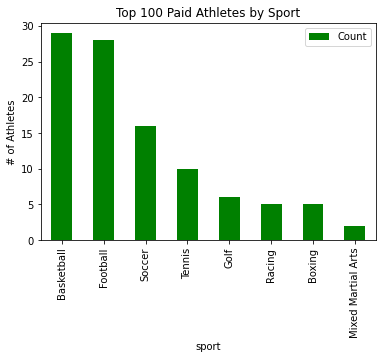

In [17]:
def menu():
    print("[1] Bar Graph for Top 100 Paid Athletes by Sport")
    print("[2] Bar Graph for Sport Popularity by Country")
    print("[3] Correlation Heatmap: Toughness & Top 100 Earnings")
    print("[4] Descriptive Statistics for Toughness by Country")

    option=int(input("Select option number:"))
    while option !=0:
        if option ==1: #do option 1
            print("Bar Graph for Top 100 Paid Athletes by Sport")
            sportCounts=DataFrame(top100.Sport.value_counts()) #making dataframe for # of athletes in each sport for top 100
            sportCounts.columns =['Count']
            sportCounts.plot(kind='bar', color='green', title='Top 100 Paid Athletes by Sport', xlabel='sport', ylabel='# of Athletes')
            plt.savefig('Top_100_Earn_By_Sport.png')

        elif option == 2: #do option 2
            print("Bar Graph for Sport Popularity by Country")
            BR2008=DataFrame(country.bleacherRep2008.value_counts()) #making dataframe for sport popularity by country
            BR2008.columns =['Count']  #making bar graph showing athlete # by sport
            BR2008.plot(kind='bar', color='purple', title='Popular Sports by Country', xlabel='Sport', ylabel='#of Countries') 

        elif option==3:
            print("Correlation Heatmap: Toughness & Top 100 Earnings")
            toptough=pd.merge(tough,top100, on='Sport') #merging top100 & tough together on sport
            toptoughclean=toptough.drop('Endurance', axis=1) #getting rid of unnecessary colummns
            toptoughclean=toptoughclean.drop('Strength', axis=1)
            toptoughclean=toptoughclean.drop('Power', axis=1)
            toptoughclean=toptoughclean.drop('Speed', axis=1)
            toptoughclean=toptoughclean.drop('Agility', axis=1)
            toptoughclean=toptoughclean.drop('Flexibility', axis=1)
            toptoughclean=toptoughclean.drop('Nerve', axis=1)
            toptoughclean=toptoughclean.drop('Durability', axis=1)
            toptoughclean=toptoughclean.drop('Hand-Eye Coordination', axis=1)
            toptoughclean=toptoughclean.drop('Analytic Aptitude', axis=1)
            toptoughclean=toptoughclean.drop('Year', axis=1)
            toptoughclean=toptoughclean.rename(columns={'TOTAL':'Toughness','Name':'Player Name'})
            #finding correlation between toughness total & player earnings & making heatmap
            sb.heatmap(toptoughclean.corr(), cmap="Blues", annot=True)
            #plt.savefig('Correlation_Top100_Toughness.png')

        elif option==4: #do option 4
            print('Descriptive Statistics for Toughness by Country')
            print(f"{PopToughClean.describe()}")
        #elif option==0:
         #   return()
        else:
            print('invalid option, select again')
            option = int(input("Select option number:"))
        return()
  #  print("Program has ended. Have a great day")

menu() #trying option 1

[1] Bar Graph for Top 100 Paid Athletes by Sport
[2] Bar Graph for Sport Popularity by Country
[3] Correlation Heatmap: Toughness & Top 100 Earnings
[4] Descriptive Statistics for Toughness by Country


Select option number: 2


Bar Graph for Sport Popularity by Country


()

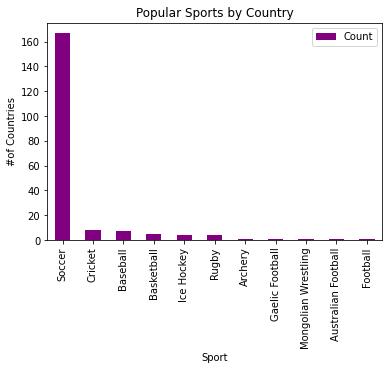

In [18]:
menu() #trying option 2

[1] Bar Graph for Top 100 Paid Athletes by Sport
[2] Bar Graph for Sport Popularity by Country
[3] Correlation Heatmap: Toughness & Top 100 Earnings
[4] Descriptive Statistics for Toughness by Country


Select option number: 3


Correlation Heatmap: Toughness & Top 100 Earnings


()

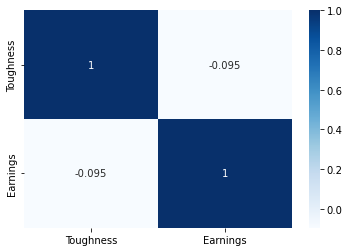

In [20]:
menu() #trying option 3

In [21]:
menu() #trying option 4

[1] Bar Graph for Top 100 Paid Athletes by Sport
[2] Bar Graph for Sport Popularity by Country
[3] Correlation Heatmap: Toughness & Top 100 Earnings
[4] Descriptive Statistics for Toughness by Country


Select option number: 4


Descriptive Statistics for Toughness by Country
           TOTAL  bleacherRep2008
count   6.000000         6.000000
mean   60.104167        30.333333
std    15.070131        66.973627
min    30.625000         1.000000
25%    60.750000         1.750000
50%    64.687500         4.000000
75%    68.250000         4.750000
max    71.750000       167.000000


()